Compare simulations ape_ia_8000_13_0Sto3W and ape_ia_8000_13_0Sto0S. Both are started from a stable Waterbelt in ape_ia_8000_13_0S, then the ice model is changed (and output increased to daily). Winton simulations falls into a Snowball, Semnter stays stable.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import holoviews as hv
from holoviews import opts
from datetime import datetime
import pandas as pd
import sys, importlib

sys.path.append("../../python_packages")
import ICON_tools 
importlib.reload(ICON_tools)

<module 'ICON_tools' from '../../python_packages/ICON_tools.py'>

In [2]:
path_3W = "/jetfs/scratch/jhoerner/postprocessing/ape_ia_8000_13_0Sto3W/"
path_0S = "/jetfs/scratch/jhoerner/postprocessing/ape_ia_8000_13_0Sto0S/"


DS_3Wzm = xr.open_dataset(path_3W + "ape_ia_8000_13_0Sto3W_atm_2d_ml_y400-405.zm.nc")
DS_0Szm = xr.open_dataset(path_0S + "ape_ia_8000_13_0Sto0S_atm_2d_ml_y400-405.zm.nc")

In [3]:
startyear = DS_3Wzm.time.values[0].year
time_3W = [DS_3Wzm.time.values[i].day + (DS_3Wzm.time.values[i].month-1)*30 + (DS_3Wzm.time.values[i].year - startyear)*360 for i in range(len(DS_3Wzm.time))]

In [4]:
startyear = DS_0Szm.time.values[0].year
time_0S = [DS_0Szm.time.values[i].day + (DS_0Szm.time.values[i].month-1)*30 + (DS_0Szm.time.values[i].year - startyear)*360 for i in range(len(DS_0Szm.time))]

## Surface albedo zonal mean

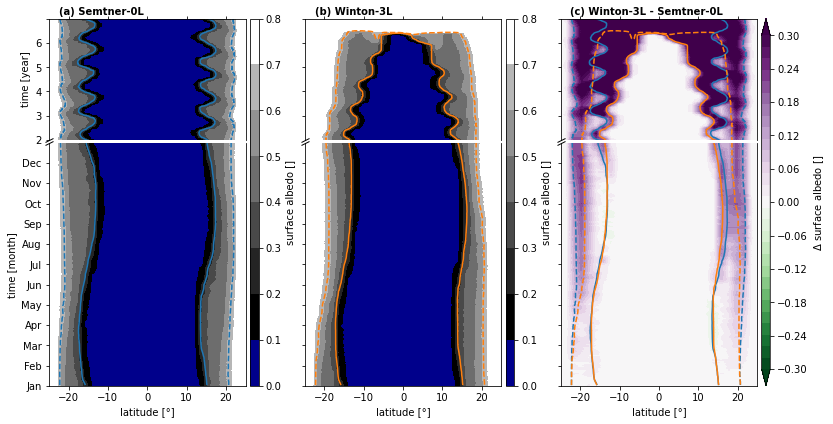

In [5]:
fig, ax = plt.subplots(2,3, figsize=(12,6),sharex=True, gridspec_kw={'height_ratios': [1, 2]})

nlevs = 9
levs=np.linspace(0,0.8,nlevs)

colors1 = np.linspace(0,1,nlevs-1)
colors = np.append("darkblue",colors1.astype("str"))

cmap= mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(levs, cmap.N)

nlevs_diff = 30

time_test = np.arange(0,len(DS_3Wzm.time),1)
for yaxind in [0,1]:
    im0 = ax[yaxind, 0].contourf(DS_0Szm.lat, time_0S, ICON_tools.get_albedo(DS_0Szm, "surf").squeeze(), levels=levs, cmap=cmap, norm=norm)
    ax[yaxind, 0].contour(DS_0Szm.lat, time_0S, DS_0Szm.sic.squeeze(), levels=[0.5], colors="C0")
    ax[yaxind, 0].contour(DS_0Szm.lat, time_0S, DS_0Szm.snowfrac.squeeze(), levels=[0.5], colors="C0", linestyles="--")

    im1 = ax[yaxind, 1].contourf(DS_3Wzm.lat, time_3W, ICON_tools.get_albedo(DS_3Wzm, "surf").squeeze(), levels=levs, cmap=cmap, norm=norm)
    ax[yaxind, 1].contour(DS_3Wzm.lat, time_3W, DS_3Wzm.sic.squeeze(), levels=[0.5], colors="C1")
    ax[yaxind, 1].contour(DS_3Wzm.lat, time_3W, DS_3Wzm.snowfrac.squeeze(), levels=[0.5], colors="C1", linestyles="--")

    im2 = ax[yaxind, 2].contourf(DS_0Szm.lat, time_0S, ICON_tools.get_albedo(DS_3Wzm, "surf").squeeze() - ICON_tools.get_albedo(DS_0Szm, "surf").squeeze(), cmap="PRGn_r", levels=np.linspace(-0.3,0.3,nlevs_diff), extend="both")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_0S, DS_0Szm.sic.squeeze(), levels=[0.5], colors="C0")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_3W, DS_3Wzm.sic.squeeze(), levels=[0.5], colors="C1")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_0S, DS_0Szm.snowfrac.squeeze(), levels=[0.5], colors="C0", linestyles="--")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_3W, DS_3Wzm.snowfrac.squeeze(), levels=[0.5], colors="C1", linestyles="--")

for axind in [0,1,2]:
    ax[1, axind].set_xlabel("latitude [°]")
    ax[1, axind].set_yticks([1], labels="")
    ax[1, axind].set_ylim(1,360)
    ax[0, axind].set_ylim(361,6*361)
    ax[0, axind].set_yticks(np.arange(2*361,6*361,360),labels="")
    ax[1, axind].set_yticks(np.arange(1,361,30),labels="")

ax[1, 0].set_ylim(1,360)
ax[1, 0].set_xlim(-25,25)
ax[1, 0].set_yticks(np.arange(1,361,30), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


ax[0, 0].annotate("(a) Semtner-0L", xycoords="axes fraction", xy=(0.05,1.03), fontweight="bold")
ax[0, 1].annotate("(b) Winton-3L", xycoords="axes fraction", xy=(0.05,1.03), fontweight="bold")
ax[0, 2].annotate("(c) Winton-3L - Semtner-0L", xycoords="axes fraction", xy=(0.05,1.03), fontweight="bold")

ax[1, 0].set_ylabel("time [month]")
ax[0, 0].set_ylabel("time [year]")
ax[0, 0].set_yticks(np.arange(1*361,6*361,360),labels=["2","3","4","5","6",""])



# split axis"
# hide the spines between ax and ax2
for axind in [0,1,2]:
    ax[0, axind].spines['bottom'].set_visible(False)
    ax[1, axind].spines['top'].set_visible(False)
    ax[0, axind].xaxis.tick_top()
    ax[0, axind].tick_params(labeltop=False)  # don't put tick labels at the top
    ax[1, axind].xaxis.tick_bottom()



d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
for axind in [0,1,2]:
    ax[0,axind].plot([0], [0], transform=ax[0,axind].transAxes, **kwargs)
    ax[1,axind].plot([0], [1], transform=ax[1,axind].transAxes, **kwargs)

    
# colorbars
ax_cb = np.empty(3,dtype="object")
plt.subplots_adjust(left=0.05, bottom=0.1, top=0.95, hspace=0.02, wspace=0.3, right=0.87)

x1 = ax[0,0].get_position().x1+0.005
x2 = ax[0,1].get_position().x1+0.005
x3 = ax[0,2].get_position().x1+0.005
y1 = ax[1,0].get_position().y0
y2 = ax[0,0].get_position().y1

ax_cb[2] = fig.add_axes([x3, y1, 0.01, y2-y1])
cbar_diff = fig.colorbar(im2, cax=ax_cb[2], ticks=np.linspace(-0.3,0.3,11), label="$\Delta$ surface albedo []")

ax_cb[1] = fig.add_axes([x2, y1, 0.01, y2-y1])
cbar2 = fig.colorbar(im1, cax=ax_cb[1], label="surface albedo []")

ax_cb[0] = fig.add_axes([x1, y1, 0.01, y2-y1])
cbar1 = fig.colorbar(im0, cax=ax_cb[0], label="surface albedo []")

#plt.tight_layout()
plt.savefig("plots/Fig6-0Sto3W_surfalb.pdf")
plt.savefig("plots/Fig6-0Sto3W_surfalb.png", dpi=300)

### 10000ppmv simulation

In [6]:
path_3W = "/jetfs/scratch/jhoerner/postprocessing/ape_ia_10000_13_0Sto3W/"
path_0S = "/jetfs/scratch/jhoerner/postprocessing/ape_ia_10000_13_0Sto0S/"

DS_3Wzm = xr.open_dataset(path_3W + "ape_ia_10000_13_0Sto3W_atm_2d_ml.zm.nc")
DS_0Szm = xr.open_dataset(path_0S + "ape_ia_10000_13_0Sto0S_atm_2d_ml.zm.nc")

In [7]:
startyear = DS_3Wzm.time.values[0].year
time_3W = [DS_3Wzm.time.values[i].day + (DS_3Wzm.time.values[i].month-1)*30 + (DS_3Wzm.time.values[i].year - startyear)*360 for i in range(len(DS_3Wzm.time))]

In [8]:
startyear = DS_0Szm.time.values[0].year
time_0S = [DS_0Szm.time.values[i].day + (DS_0Szm.time.values[i].month-1)*30 + (DS_0Szm.time.values[i].year - startyear)*360 for i in range(len(DS_0Szm.time))]

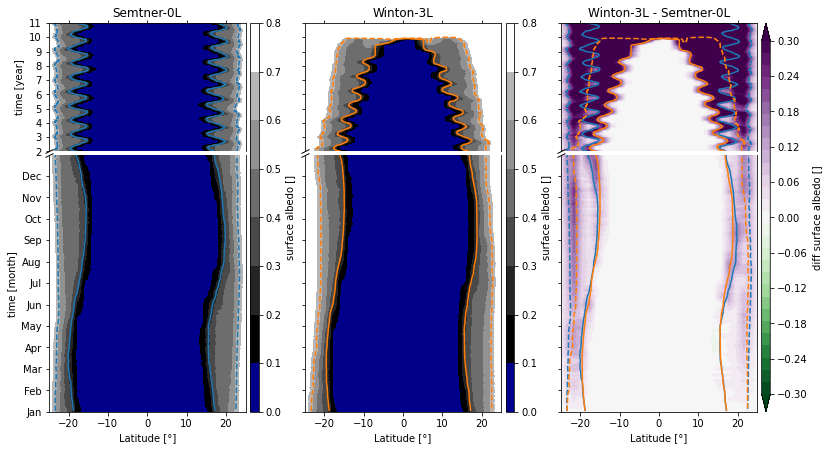

In [9]:
fig, ax = plt.subplots(2,3, figsize=(12,6),sharex=True, gridspec_kw={'height_ratios': [1, 2]})

nlevs = 9
levs=np.linspace(0,0.8,nlevs)

colors1 = np.linspace(0,1,nlevs-1)
colors = np.append("darkblue",colors1.astype("str"))

cmap= mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(levs, cmap.N)

nlevs_diff = 30

time_test = np.arange(0,len(DS_3Wzm.time),1)
for yaxind in [0,1]:
    im0 = ax[yaxind, 0].contourf(DS_0Szm.lat, time_0S, ICON_tools.get_albedo(DS_0Szm, "surf").squeeze(), levels=levs, cmap=cmap, norm=norm)
    ax[yaxind, 0].contour(DS_0Szm.lat, time_0S, DS_0Szm.sic.squeeze(), levels=[0.5], colors="C0")
    ax[yaxind, 0].contour(DS_0Szm.lat, time_0S, DS_0Szm.snowfrac.squeeze(), levels=[0.5], colors="C0", linestyles="--")

    im1 = ax[yaxind, 1].contourf(DS_3Wzm.lat, time_3W, ICON_tools.get_albedo(DS_3Wzm, "surf").squeeze(), levels=levs, cmap=cmap, norm=norm)
    ax[yaxind, 1].contour(DS_3Wzm.lat, time_3W, DS_3Wzm.sic.squeeze(), levels=[0.5], colors="C1")
    ax[yaxind, 1].contour(DS_3Wzm.lat, time_3W, DS_3Wzm.snowfrac.squeeze(), levels=[0.5], colors="C1", linestyles="--")

    im2 = ax[yaxind, 2].contourf(DS_0Szm.lat, time_0S, ICON_tools.get_albedo(DS_3Wzm, "surf").squeeze() - ICON_tools.get_albedo(DS_0Szm, "surf").squeeze(), cmap="PRGn_r", levels=np.linspace(-0.3,0.3,nlevs_diff), extend="both")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_0S, DS_0Szm.sic.squeeze(), levels=[0.5], colors="C0")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_3W, DS_3Wzm.sic.squeeze(), levels=[0.5], colors="C1")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_0S, DS_0Szm.snowfrac.squeeze(), levels=[0.5], colors="C0", linestyles="--")
    ax[yaxind, 2].contour(DS_0Szm.lat, time_3W, DS_3Wzm.snowfrac.squeeze(), levels=[0.5], colors="C1", linestyles="--")

for axind in [0,1,2]:
    ax[1, axind].set_xlabel("Latitude [°]")
    ax[1, axind].set_yticks([1], labels="")
    ax[1, axind].set_ylim(1,360)
    ax[0, axind].set_ylim(361,6*361)
    ax[0, axind].set_yticks(np.arange(2*361,10*361,360),labels="")
    ax[1, axind].set_yticks(np.arange(1,361,30),labels="")

ax[1, 0].set_ylim(1,360)
ax[1, 0].set_xlim(-25,25)
ax[1, 0].set_yticks(np.arange(1,361,30), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
#plt.colorbar(im0, ax=ax[1, 0], label="surface albedo []")
#plt.colorbar(im1, ax=ax[1, 1], label="surface albedo []")
#plt.colorbar(im2, ax=ax[1, 2], label="diff surface albedo []", ticks=np.linspace(-0.3,0.3,11))
ax[0, 0].set_title("Semtner-0L")
ax[0, 1].set_title("Winton-3L")
ax[0, 2].set_title("Winton-3L - Semtner-0L")

ax[1, 0].set_ylabel("time [month]")
ax[0, 0].set_ylabel("time [year]")
ax[0, 0].set_yticks(np.arange(1*361,10*361,360),labels=["2","3","4","5","6","7","8","9","10","11"])



# split axis"
# hide the spines between ax and ax2
for axind in [0,1,2]:
    ax[0, axind].spines['bottom'].set_visible(False)
    ax[1, axind].spines['top'].set_visible(False)
    ax[0, axind].xaxis.tick_top()
    ax[0, axind].tick_params(labeltop=False)  # don't put tick labels at the top
    ax[1, axind].xaxis.tick_bottom()



d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
for axind in [0,1,2]:
    ax[0,axind].plot([0], [0], transform=ax[0,axind].transAxes, **kwargs)
    ax[1,axind].plot([0], [1], transform=ax[1,axind].transAxes, **kwargs)

    
# colorbars
ax_cb = np.empty(3,dtype="object")
plt.subplots_adjust(left=0.05, bottom=0.05, top=0.95, hspace=0.02, wspace=0.3, right=0.87)

x1 = ax[0,0].get_position().x1+0.005
x2 = ax[0,1].get_position().x1+0.005
x3 = ax[0,2].get_position().x1+0.005
y1 = ax[1,0].get_position().y0
y2 = ax[0,0].get_position().y1

ax_cb[2] = fig.add_axes([x3, y1, 0.01, y2-y1])
cbar_diff = fig.colorbar(im2, cax=ax_cb[2], ticks=np.linspace(-0.3,0.3,11), label="diff surface albedo []")

ax_cb[1] = fig.add_axes([x2, y1, 0.01, y2-y1])
cbar2 = fig.colorbar(im1, cax=ax_cb[1], label="surface albedo []")

ax_cb[0] = fig.add_axes([x1, y1, 0.01, y2-y1])
cbar1 = fig.colorbar(im0, cax=ax_cb[0], label="surface albedo []")

#plt.tight_layout()
#plt.savefig("plots/Fig6alt_0Sto3W_surfalb.pdf")